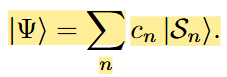

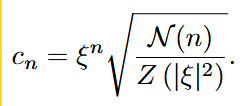

In [1]:
import torch as tc
import numpy as np
from WorkFlow.main import InitStates
import math

In [2]:
c = math.comb(10, 8)
print(c)

45


In [3]:
def RK_initial_state(length:int, ksi:float, device=tc.device('cuda:0'), dtype=tc.complex128, **kwargs):
    ksi = tc.tensor([ksi], dtype=dtype, device=device)
    Lb = length // 2
    state = tc.zeros((2 ** length, ), dtype=dtype, device=device)
    state[-1] = 1 + 0.j
    state = state.reshape([1] + [2]*length)
    for n in range(Lb):
        state = state + InitStates.xorX_state_m(n, length, device, dtype) * tc.pow(ksi, n) * math.comb(length - n - 1, n)
    state = state.reshape([1, -1])
    shape_ = [1] + [2]*length
    norm = tc.sum(state * state.conj(), dim=1, keepdim=True)
    state = state / tc.sqrt(norm)
    state = state.reshape(shape_)
    return state


In [4]:
length = 6
ksi = 5
device = tc.device('cpu')
dtype = tc.complex64
state = RK_initial_state(length, ksi, device, dtype)


In [5]:
print(state.shape)
norm = tc.sum(state.reshape(-1) * state.reshape(-1).conj())
print(norm)

torch.Size([1, 2, 2, 2, 2, 2, 2])
tensor(1.0000+0.j)


In [6]:
def RK_states(number:int, length:int, ksi_bar:float, device=tc.device('cuda:0'), dtype=tc.complex128):
    ksi_list = np.linspace(0, ksi_bar, number)
    state_list = []
    for ksi in ksi_list:
        state = RK_initial_state(length, ksi, device, dtype)
        state_list.append(state)
    states = tc.cat(state_list, dim=0)
    return states, ksi_list

In [7]:
number = 5
states, ksi_list = RK_states(number=number, length=length, ksi_bar=0.5, device=device, dtype=dtype)
print(ksi_list)
print(states.shape)
states_ = states.reshape([number, -1])
print(tc.einsum('ai, ai->a', states_, states_.conj()))

[0.    0.125 0.25  0.375 0.5  ]
torch.Size([5, 2, 2, 2, 2, 2, 2])
tensor([1.0000+0.j, 1.0000+0.j, 1.0000+0.j, 1.0000+0.j, 1.0000+0.j])


In [24]:
state = InitStates.RK_initial_state(4, 0.5, device=tc.device('cpu'), dtype=tc.complex128)
print(state)

tensor([[[[[ 0.0000+0.j,  0.0000+0.j],
           [ 0.0000+0.j,  0.0000+0.j]],

          [[ 0.0000+0.j,  0.0000+0.j],
           [ 0.0000+0.j,  0.0000+0.j]]],


         [[[ 0.0000+0.j,  0.0000+0.j],
           [ 0.0000+0.j, -0.3162+0.j]],

          [[ 0.0000+0.j,  0.3162+0.j],
           [ 0.0000+0.j,  0.8944+0.j]]]]], dtype=torch.complex128)


In [33]:
state = InitStates.xorX_state_m(3, 8, device=tc.device('cpu'), dtype=tc.complex128)
print(state)

tensor([[[[[[[[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]]],


             [[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]]]],



            [[[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]]],


             [[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]]]]],




           [[[[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]]],


             [[[ 0.0000+0.j,  0.0000+0.j],
               [ 0.0000+0.j,  0.0000+0.j]],

              [[

In [34]:
states = InitStates.RK_states(3, 8, 5, device=tc.device('cpu'), dtype=tc.complex128)
print(states.shape)
print(states[1])

torch.Size([3, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([[[[[[[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],

             [[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]]],


            [[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],

             [[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]]]],



           [[[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],

             [[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]]],


            [[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],

             [[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]]]]],




          [[[[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],

             [[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]]],


            [[[ 0.0000+0.j,  0.0000+0.j],
              [ 0.0000+0.j,  0.0000+0.j]],